In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
comparison_folders = ['models/comparisons/', 'models/experiments/']

## Epochs

Plot the saved epoch experiment results. 

In [5]:
files = []
i=0
for f in os.listdir(comparison_folders[0] + 'epochs_experiments') + os.listdir(comparison_folders[1] + 'epochs_experiments'):
    if f[-1] == 't':
        # Remove those we don't want (wan and subset)
        if not 'subset' in f and not 'wan' in f:
            # + only one try_lstm
            if 'try_lstm' in f and 'lr0p001' in f:
                pass
            else:
                print(str(i) + ' is ' + f)
                files+=[f]
                i+=1
print(files)
archs=['CNN LSTM', 'LSTM', 'multi-CNN', 'CNN']

0 is try_cnn_lstm_epochs_dropouts_respeck.txt
1 is try_cnn_lstm_epochs_dropouts_thingy.txt
2 is try_lstm_epochs_dropouts_respeck.txt
3 is try_lstm_epochs_dropouts_thingy.txt
4 is multihead_cnn_epochs_dropouts_respeck.txt
5 is multihead_cnn_epochs_dropouts_thingy.txt
6 is promising_cnn_epochs_Respeck.txt
7 is promising_cnn_epochs_Thingy.txt
['try_cnn_lstm_epochs_dropouts_respeck.txt', 'try_cnn_lstm_epochs_dropouts_thingy.txt', 'try_lstm_epochs_dropouts_respeck.txt', 'try_lstm_epochs_dropouts_thingy.txt', 'multihead_cnn_epochs_dropouts_respeck.txt', 'multihead_cnn_epochs_dropouts_thingy.txt', 'promising_cnn_epochs_Respeck.txt', 'promising_cnn_epochs_Thingy.txt']


In [6]:
def acc_plot(to_plot, ax, i, typ='acc', chosen_epoch=-1):
    columns=to_plot.columns
    acc_cols = [c for c in columns if typ in c and not 'val' in c]
    val_acc_cols = [c for c in columns if 'val_'+typ in c]
    #acc_cols = [c for c in columns if c[:3] == 'acc']
    #val_acc_cols = [c for c in columns if c[:7] == 'val_acc']
    epochs = np.arange(len(acc_cols)) + 1
    
    if typ=='acc':
        typ='accuracy'

    ax.plot(epochs, df[acc_cols].mean(), label=archs[i]+' train '+typ, color=colours[i])
    ax.plot(epochs, df[val_acc_cols].mean(), label=archs[i]+' val '+typ, color=colours[i], linestyle='--')
    ax.xticks(np.arange(20)+1)
    ax.xlabel('epoch')
    ax.ylabel(typ)
    ax.legend()
    
    if chosen_epoch != -1:
        ax.scatter(chosen_epoch, df[acc_cols].mean()[chosen_epoch-1], color=colours[i], marker='D')
        ax.scatter(chosen_epoch, df[val_acc_cols].mean()[chosen_epoch-1], color=colours[i], marker='D')

In [7]:
respeck_files = [f for f in files if 'especk' in f]
thingy_files = [f for f in files if 'hingy' in f]
colours = ['blue', 'red', 'green', 'orange']
sensor_files = {'Respeck': respeck_files, 'Thingy':thingy_files}

In [8]:
chosen_epochs = {'try_cnn_lstm_epochs_dropouts_respeck.txt': 3, \
        'try_cnn_lstm_epochs_dropouts_thingy.txt': 5, \
        'try_lstm_epochs_dropouts_respeck.txt': 3, \
        'try_lstm_epochs_dropouts_thingy.txt': 5, \
        'multihead_cnn_epochs_dropouts_respeck.txt': 5, \
        'multihead_cnn_epochs_dropouts_thingy.txt': 5, \
        'promising_cnn_epochs_Respeck.txt': 10, \
        'promising_cnn_epochs_Thingy.txt': 10
                }

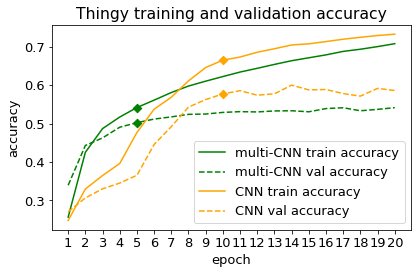

In [14]:
loss_or_acc='acc' # loss or acc
sensor='Thingy' # Thingy or Respeck
epochs_length= 20 # -1, 10, or 20

font = {'size': 13}

plt.rc('font', **font)
    
for i, f in enumerate(sensor_files[sensor]):
    try:
        df = pd.read_csv(comparison_folders[0] + 'epochs_experiments/' + f)
    except:
        df = pd.read_csv(comparison_folders[1] + 'epochs_experiments/' + f)

    chosen_epoch=chosen_epochs[f]

    if epochs_length == -1 or len(df.columns) == 4*epochs_length+3:

        if len(df['title'].unique()) == 1:
            acc_plot(df, plt, i, loss_or_acc, chosen_epoch)

        else:
            to_plot=df[df['title']=="{'dropout': 0.5}"]
            acc_plot(to_plot, plt, i, loss_or_acc, chosen_epoch)

if loss_or_acc=='acc':
    loss_or_acc='accuracy'
plt.title(sensor + ' training and validation ' + loss_or_acc)
plt.tight_layout()
plt.savefig('figures/big_font/'+sensor+'_'+loss_or_acc+'_length_' + str(epochs_length) + '.pdf')
plt.show()
    

## Parameter search

Read in the files that contain the results of the parameter experiments and make the latex tables. 

In [3]:
files = []
i=0
for f in os.listdir(comparison_folders[0] + 'parameter_search_experiments') + os.listdir(comparison_folders[1] + 'parameter_search_experiments'):
    if f[-1] == 'v' and 'subset' not in f:
        print(str(i) + ' is ' + f)
        files+=[f]
        i+=1
print(files)

0 is try_cnn_lstm_parameter_search_respeck.csv
1 is try_cnn_lstm_parameter_search_thingy.csv
2 is try_lstm_parameter_search_respeck.csv
3 is try_lstm_parameter_search_thingy.csv
4 is multihead_cnn_parameter_search_respeck.csv
5 is multihead_cnn_parameter_search_thingy.csv
6 is promising_cnn_parameter_search_Respeck.csv
7 is promising_cnn_parameter_search_Thingy.csv
['try_cnn_lstm_parameter_search_respeck.csv', 'try_cnn_lstm_parameter_search_thingy.csv', 'try_lstm_parameter_search_respeck.csv', 'try_lstm_parameter_search_thingy.csv', 'multihead_cnn_parameter_search_respeck.csv', 'multihead_cnn_parameter_search_thingy.csv', 'promising_cnn_parameter_search_Respeck.csv', 'promising_cnn_parameter_search_Thingy.csv']


In [4]:
models={'try_cnn_lstm':'CNN LSTM', 'try_lstm':'LSTM', 'multihead_cnn': 'multi-CNN', 'promising_cnn':'CNN'}
thingy_files={}
respeck_files={}

In [37]:
for i, f in enumerate(files):
    print('-------------------------')
    print(f)
    model=[m for m in models if m in f][0]
    
    try:
        df = pd.read_csv(comparison_folders[0] + 'parameter_search_experiments/' + f)
    except:
        df = pd.read_csv(comparison_folders[1] + 'parameter_search_experiments/' + f)
        
    if 'dropout' in df.columns:
        if len(df['dropout'].unique()) == 1:
            pass

        else:
            df=df[df['dropout']=="0.5"]
        df = df.drop(columns=['dropout'])
            
    if 'hingy' in f:
        thingy_files[model]=df
    else: 
        respeck_files[model]=df
        
    #print(df[df['sacc_mean'] == df['sacc_mean'].max()])
    #print(df[df['acc_mean'] == df['acc_mean'].max()])

-------------------------
try_cnn_lstm_parameter_search_respeck.csv
-------------------------
try_cnn_lstm_parameter_search_thingy.csv
-------------------------
try_lstm_parameter_search_respeck.csv
-------------------------
try_lstm_parameter_search_thingy.csv
-------------------------
multihead_cnn_parameter_search_respeck.csv
-------------------------
multihead_cnn_parameter_search_thingy.csv
-------------------------
promising_cnn_parameter_search_Respeck.csv
-------------------------
promising_cnn_parameter_search_Thingy.csv


In [38]:
df

,Unnamed: 0,epochs,filters,kernel_size,batch_size,learning_rate,acc_mean,sacc_mean
0,0,10,16,2,32,0.010,0.559787,0.815442
1,1,10,16,2,32,0.001,0.566751,0.832880
2,2,10,16,2,64,0.010,0.506408,0.806936
3,3,10,16,2,64,0.001,0.556423,0.824195
4,4,10,16,2,128,0.010,0.551505,0.819072
...,...,...,...,...,...,...,...,...
59,59,10,128,3,64,0.001,0.584559,0.843074
60,60,10,128,3,128,0.010,0.564193,0.830088
61,61,10,128,3,128,0.001,0.573819,0.838649
62,62,10,128,3,256,0.010,0.553842,0.845003


In [46]:
vocab = {'filters': 'Filters', 'kernel_size': 'Kernel size', \
     'batch_size': 'Batch size', 'acc_mean': 'Accuracy', 'sacc_mean': '\specialcell{Subset\\\\Accuracy}', \
        'nn_units': 'NN units', 'lstm_unit': 'LSTM units', 'multihead_kernel_size': 'Kernel size',\
        'learning_rate': 'Learning rate', 'kernels':'Kernel size'}

In [7]:
list(models.keys())

['try_cnn_lstm', 'try_lstm', 'multihead_cnn', 'promising_cnn']

In [65]:
# Make the latex tables

def get_table_values(df, sensor):
    table=''
    
    values = df[df['acc_mean'] == df['acc_mean'].max()]
    values['acc_mean'] = np.round(values['acc_mean'],3)
    values['sacc_mean'] = np.round(values['sacc_mean'],3)
    #values=values.values[0]
    #values = [str(v) for v in values]
    df_small = df[df['acc_mean'] == df['acc_mean'].max()]
    values=[str(values[d].values[0]) for d in df_small]
    table += '\multirow{2}{*}{\specialcell{\\\\' + sensor +'}} & '
    table += '\specialcell{Max\\\\Accuracy} & ' + ' & '.join(values) + ' \\\\ \cline{2-' + str(len(cols)+2) + '} \n'

    values = df[df['sacc_mean'] == df['sacc_mean'].max()]
    values['acc_mean'] = np.round(values['acc_mean'],3)
    values['sacc_mean'] = np.round(values['sacc_mean'],3)
    #values=values.values[0]
    #values = [str(v) for v in values]
    df_small = df[df['sacc_mean'] == df['sacc_mean'].max()]
    values=[str(values[d].values[0]) for d in df_small]
    table += '& \specialcell{Max Subset\\\\Accuracy} & ' + ' & '.join(values)  + ' \\\\ \hline \n'
    
    return table

def drop_columns(df):
    return df.drop(columns=['Unnamed: 0', 'epochs'])
    
for model in list(models.keys()):
    #model=list(models.keys())[0]

    df_thingy=thingy_files[model]
    df_thingy = drop_columns(df_thingy)
    df_respeck=respeck_files[model]
    df_respeck = drop_columns(df_respeck)

    table='\\begingroup\n\\begin{table}[h]\n'
    table+='\\caption{The parameter configurations with the highest overall and subset accuracy for the '+ model
    table+= ' from the parameter experiments.}\n\\label{tab:exp_results_'+model+'}'
    table += '\\setlength{\\tabcolsep}{2pt}\n\\makebox[\\textwidth][c]{\n\\small\n\\begin{tabular}'
    table += '{ ' + '| c ' * (len(df_thingy.columns)+2) + '| } \hline \n'
    cols=[vocab[c] for c in df_thingy.columns]
    table += '\\textbf{Sensor} & \\textbf{Measure} & \\textbf{' + '} & \\textbf{'.join(cols) + '} \\\\ \hline \n'

    table += get_table_values(df_respeck, 'Respeck')
    
    table += get_table_values(df_thingy, 'Thingy')

    table += '\\end{tabular}\n}\n\end{table}\n\\endgroup'

    print(table)
    print('\n\n')

\begingroup
\begin{table}[h]
\caption{The parameter configurations with the highest overall and subset accuracy for the try_cnn_lstm from the parameter experiments.}
\label{tab:exp_results_try_cnn_lstm}\setlength{\tabcolsep}{2pt}
\makebox[\textwidth][c]{
\small
\begin{tabular}{ | c | c | c | c | c | c | c | c | c | c | } \hline 
\textbf{Sensor} & \textbf{Measure} & \textbf{Filters} & \textbf{Kernel size} & \textbf{LSTM units} & \textbf{NN units} & \textbf{Batch size} & \textbf{Learning rate} & \textbf{Accuracy} & \textbf{\specialcell{Subset\\Accuracy}} \\ \hline 
\multirow{2}{*}{\specialcell{\\Respeck}} & \specialcell{Max\\Accuracy} & 64 & 2 & 128 & 64 & 64 & 0.001 & 0.602 & 0.877 \\ \cline{2-10} 
& \specialcell{Max Subset\\Accuracy} & 64 & 2 & 128 & 64 & 64 & 0.001 & 0.602 & 0.877 \\ \hline 
\multirow{2}{*}{\specialcell{\\Thingy}} & \specialcell{Max\\Accuracy} & 32 & 2 & 128 & 128 & 64 & 0.001 & 0.602 & 0.845 \\ \cline{2-10} 
& \specialcell{Max Subset\\Accuracy} & 32 & 2 & 128 & 64 & 

C:\Users\Gwenyth\miniconda3\envs\pdiot\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Gwenyth\miniconda3\envs\pdiot\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gwenyth\miniconda3\envs\pdiot\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave